<a href="https://colab.research.google.com/github/BobYa1/DL_python/blob/main/docx_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **הדפסה אוטומטית ל-WORD**

In [1]:
# Install docx printing module

# התקנת מודול חיצוני
!pip install python-docx

# https://pypi.org/project/python-docx/
# https://python-docx.readthedocs.io/en/latest/

     |████████████████████████████████| 5.5MB 8.2MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp37-none-any.whl size=184491 sha256=8a7bf01d40dede746a652e1816b1b666cd49a39bc6f54117ea26ed7c98ab7ff9
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx


Saving GreatCat.jpg to GreatCat.jpg


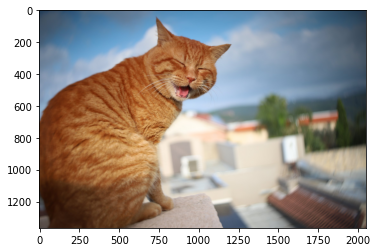

In [2]:
# תוכנת הדפסה לוורד

# אזור טעינת מודולים של תוכנה
# import docx
# docx.Document.add_heading()
#docx - מודול ראשי
# . - משמעות כמו סלאש - תרד לתת מודול
# Document - תת מודול
# add_heading - פקודה בתת מודול

# חיסרונות
# טעינה של כל מה שיש במודל וורד מעמיסה על הזיכרון
# לא מסודר
# כשרושמים במפורט מה מייביאים אז תוך כדי מסדרים את השלבים לביצוע התוכנה והכלים הדרושים

from docx import Document  #  טען ממודול וורד את התת מודול דוקומנט
# add_heading()
from docx.shared import Inches 
from google.colab import files
# ייבואו והדפסה של תמונה בוורד
from io import BytesIO
from PIL import Image # https://pillow.readthedocs.io/en/stable/

import matplotlib.pyplot as plt  # https://matplotlib.org
# https://matplotlib.org/tutorials/introductory/pyplot.html
# https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.plot.html

import numpy as np


document = Document() # יצירת אוביקט מסמך וורד וירטואלי
# document1 = Document() # יצירת אוביקט מסמך וורד וירטואלי

# a='Hello'
# print(a.upper())
document.add_heading('Document Title', 0) # הוספת כותרת

p = document.add_paragraph('A plain paragraph having some ')  # הוספת פסקה

text_var = 'Hello World!'
p = document.add_paragraph(text_var)  # הוספת פסקה
p = document.add_paragraph(f'I have {25} students')  # הוספת פסקה

text_var1 = 'Results: \n'
temp = 25
text_var2 = 'Temp:' + str(temp) + '[C]'
p = document.add_paragraph(text_var1 + text_var2)  # הוספת פסקה

p.add_run('\n bold').bold = True
p.add_run(' and some ')
p.add_run('italic.').italic = True

p.add_run('\n The new date: ').bold = True
p.add_run('09/12/2020.').italic = True
p.add_run('\n Good Day! ')

document.add_heading('Heading, level 1', level=1)
document.add_paragraph('Intense quote', style='Intense Quote')

document.add_paragraph('first item in unordered list', style='List Bullet')
document.add_paragraph('second item in unordered list', style='List Bullet')

document.add_paragraph(
    'first item in ordered list', style='List Number'
)
document.add_paragraph(
    'second item in ordered list', style='List Number'
)

uploaded = files.upload() # טעינת קבצים ממחשב
im = Image.open(BytesIO(uploaded['GreatCat.jpg']))  # כאן מכניסים שם של קובץ תמונה אותו רוצים לעלות
plt.imshow(im)   # מייצר אוביקט גרפי ממשתנה תמונה im
plt.show()    # מדפיס את האוביקט הגרפי לתצוגה 

document.add_picture(BytesIO(uploaded['GreatCat.jpg']), width=Inches(1.25))


records = (
    (3, '101', 'Spam'),
    (7, '422', 'Eggs'),
    (4, '631', 'Spam, spam, eggs, and spam')
)

table = document.add_table(rows=1, cols=4)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Qty'
hdr_cells[1].text = 'Id'
hdr_cells[2].text = 'Desc'
hdr_cells[3].text = 'Notes'
for qty, id, desc in records:
    row_cells = table.add_row().cells
    row_cells[0].text = str(qty)
    row_cells[1].text = id
    row_cells[2].text = desc

document.add_page_break()

document.save('demo.docx')